**선형 회귀를 텐서플로우와 케라스를 통한 구현**

## 1. 자동 미분

In [4]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [5]:
# tape_gradient()은 자동 미분 기능 수행
# 2w2+5 라는 식을 세우고 w에 대해 미분하기
w = tf.Variable(2.)

def f(w):
    y=w**2
    z=2*y+5
    return z

In [7]:
with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 2. 자동 미분을 이용한 선형 회귀 구현

In [11]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [12]:
@tf.function
def hypothesis(x):
    return W*x+b

In [13]:
x_test = [3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [14]:
# 평균 제곱 오차를 손실 함수로 정의
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

In [17]:
# x와 y가 약 10배 차이가 나는 데이터 사용
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑된 성적

In [16]:
# 옵티마이저는 경사 하강법, 학습률(learning rate=0.01)
optimizer = tf.optimizers.SGD(0.01)

In [22]:
# 약 300번에 걸쳐 경사 하강법 수행
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값 y_pred
        y_pred = hypothesis(X)
        
        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)
        
        # 손실 함수에 대한 파라미터의 미분값 계산
        gradients = tape.gradient(cost, [W, b])
        
        # 파라미터 업데이트
        optimizer.apply_gradients(zip(gradients, [W, b]))
        
        if i % 10 == 0:
            print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 10.4581 | b의 값 : 2.001 | cost : 1.687088
epoch :  10 | W의 값 : 10.5002 | b의 값 : 1.958 | cost : 1.341748
epoch :  20 | W의 값 : 10.5076 | b의 값 : 1.911 | cost : 1.319475
epoch :  30 | W의 값 : 10.5147 | b의 값 : 1.867 | cost : 1.298961
epoch :  40 | W의 값 : 10.5215 | b의 값 : 1.824 | cost : 1.280066
epoch :  50 | W의 값 : 10.5280 | b의 값 : 1.783 | cost : 1.262668
epoch :  60 | W의 값 : 10.5343 | b의 값 : 1.743 | cost : 1.246642
epoch :  70 | W의 값 : 10.5403 | b의 값 : 1.706 | cost : 1.231880
epoch :  80 | W의 값 : 10.5461 | b의 값 : 1.669 | cost : 1.218294
epoch :  90 | W의 값 : 10.5516 | b의 값 : 1.635 | cost : 1.205772
epoch : 100 | W의 값 : 10.5569 | b의 값 : 1.601 | cost : 1.194246
epoch : 110 | W의 값 : 10.5620 | b의 값 : 1.569 | cost : 1.183623
epoch : 120 | W의 값 : 10.5669 | b의 값 : 1.538 | cost : 1.173846
epoch : 130 | W의 값 : 10.5716 | b의 값 : 1.509 | cost : 1.164841
epoch : 140 | W의 값 : 10.5761 | b의 값 :  1.48 | cost : 1.156546
epoch : 150 | W의 값 : 10.5804 | b의 값 : 1.453 | cost : 1.148907
epoch : 

In [23]:
# 임의의 값 예측
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.352215 54.29395  59.60786  64.921776]


## 3. 케라스로 구현하는 선형 회귀
Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보 추가

```model = keras.models.Sequential()```

```model.add(keras.layers.Dense(1, input_dim=1))```

* 첫번째 인자인 1은 출력의 차원을 정의하며, 두번째 인자인 input_dim은 입력의 차원을 정의
* 이번 실습과 같이 1개의 실수 x를 가지고 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가진다.

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [25]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑된 성적

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
# sgd는 경사 하강법 의미, 학습률(learning rate, lr)은 0.01
sgd = optimizers.SGD(lr=0.01)
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 X와 y 데이터에 대해 오차를 최소화하는 작업을 300번 진행
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 1ms/step - loss: 486.9086 - mse: 486.9086
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2226 - mse: 2.2226
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2028 - mse: 2.2028
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1838 - mse: 2.1838
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1656 - mse: 2.1656
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1481 - mse: 2.1481
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1313 - mse: 2.1313
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1153 - mse: 2.1153
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.0998 - mse: 2.0998
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 2.0850 - mse: 2.0850
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 2.0

Epoch 88/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7239 - mse: 1.7239
Epoch 89/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7231 - mse: 1.7231
Epoch 90/300
9/9 [==============================] - 0s 999us/step - loss: 1.7222 - mse: 1.7222
Epoch 91/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7215 - mse: 1.7215
Epoch 92/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7207 - mse: 1.7207
Epoch 93/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7200 - mse: 1.7200
Epoch 94/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7193 - mse: 1.7193
Epoch 95/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7186 - mse: 1.7186
Epoch 96/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7179 - mse: 1.7179
Epoch 97/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7173 - mse: 1.7173
Epoch 98/300
9/9 [==============================] - 0s 1ms/step - lo

9/9 [==============================] - 0s 2ms/step - loss: 1.7001 - mse: 1.7001
Epoch 175/300
9/9 [==============================] - 0s 999us/step - loss: 1.7001 - mse: 1.7001
Epoch 176/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7001 - mse: 1.7001
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7000 - mse: 1.7000
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7000 - mse: 1.7000
Epoch 179/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6999 - mse: 1.6999
Epoch 180/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6999 - mse: 1.6999
Epoch 181/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6998 - mse: 1.6998
Epoch 182/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6998 - mse: 1.6998
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6998 - mse: 1.6998
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss:

9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 261/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 262/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 263/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 1.6988 - mse: 1.6988
Epoch 265/300
9/9 [==============================] - 0s 2ms/step - loss: 1.6988 - mse: 1.6988
Epoch 266/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 267/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 268/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 269/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 270/300
9/9 [==============================] - 0s 1ms/step - loss: 1

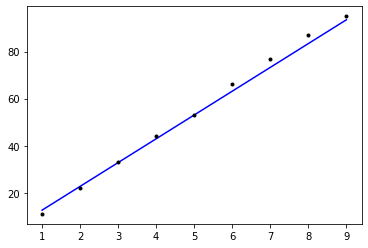

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [27]:
print(model.predict([9.5]))
# 9시간 30분을 공부하면 약 98.5점을 얻을 수 있다.(예측)

[[98.55646]]
